<a href="https://colab.research.google.com/github/alessandrobruni/tensorflow-mystudy-notes/blob/main/mathematical_building_blocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Data representations for neural networks

From book Deep learning  with Python

Here is, i beleave the most important chapter of the book.  
In tthis chapter Francois Chollet buid up the intuition aboute the mathematical concepts behind  
* tensor
* operations
* differentiation
* gradient discend 
* andthe core blocks for a **neural network** this is the most exciting part 

In [ ]:
from tensorflow.keras.datasets import mnist
(train_img, train_label), (test_img, test_label) = mnist.load_data()

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.9.0


In [ ]:
#dimension , rank of the data
print( f"ndim train: {train_img.ndim}, label {train_label.ndim}")
print( f"shape  train: {train_img.shape }, label {train_label.shape}")
print( f"dtype  train: {train_img.dtype }, label {train_label.dtype}")



ndim train: 3, label 1
shape  train: (60000, 28, 28), label (60000,)
dtype  train: uint8, label uint8


In [ ]:
import sys 
import numpy as np
np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(linewidth=300)


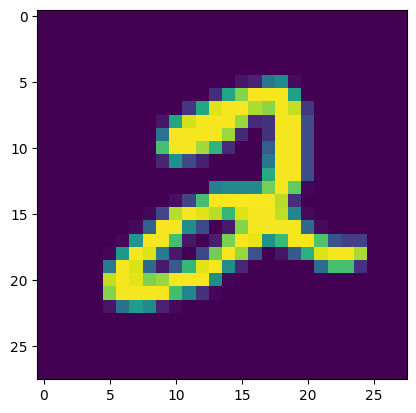

2
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13  25 100 122   7   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  33 151 208 252 252 252 146   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  40 152 244 252 253 224 211 252 232  40   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  15 152 239 252 252 252 216  31  37 252 

In [ ]:
import matplotlib.pyplot as plt
digit = train_img[5]
plt.imshow(digit)
plt.show()
print(train_label[5])
print(digit)

## bath 
In general the first axis is the batch axis.
The first axis is the one that contains the samples.
Usually models do not process all data in one time, but they split the data in small batches

In [ ]:
#batch size of 128 samples
batch = train_img[:128]

# nth  batch size = nth 128 samples 

n=3
batch_n = train_img[128*n: 128*(n+1)]
batch_n.shape

(128, 28, 28)

## Dense layer



In [ ]:
#keras instance layer is like this
from tensorflow import keras
keras.layers.Dense(512, activation = "relu")

this is equal to   
```
output= relu(dot(input, W) + d )
```





In [ ]:
import numpy as np

def my_dense(features, weigths, intercepts  ):
  assert features.ndim == 2 and intercepts.ndim ==1
  x = features + intercepts
  x = np.dot(x,weigths)
  return x

def my_relu( values):
  return np.maximum(values , 0.)

#test relu
test_values = np.random.random((4,10)) - 0.3
print(test_values)
print(np.where(test_values<0))
print(np.where(my_relu(test_values)<0)) #no one egative

[[ 0.67657228 -0.13497108  0.25514082  0.00197735  0.68483713  0.30696014  0.57219515 -0.12359165  0.09364444 -0.21790427]
 [ 0.31064961 -0.16766757  0.6610304  -0.22410969  0.13834516  0.47048557  0.63956872  0.23071545  0.53916847  0.60089567]
 [ 0.06628313  0.07772757  0.49682468  0.44909426  0.43130229  0.12594281  0.54636376 -0.09403925 -0.29693948  0.06333889]
 [ 0.37530251  0.15888781  0.36331396  0.33307616 -0.01704141 -0.17067987  0.62526479  0.45003173  0.38465725  0.36146864]]
(array([0, 0, 0, 1, 1, 2, 2, 3, 3], dtype=int64), array([1, 7, 9, 1, 3, 7, 8, 4, 5], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


## Broadcasting
When possible, and if there is no ambiguity, the small tensor will be broacasted to match the largest one.
 * axes (called the broadcast axes) are added to the smaller tensor, to match the ndim of the larger one
 *  the smallest tensor is repeted alogside these axes to match the full shape of the larger tensor

In [ ]:
import numpy as np

X = np.random.random((5,10))
Y = np.random.random(10)
X,Y


(array([[0.3512652 , 0.98409449, 0.71321451, 0.87958201, 0.8514174 , 0.72672302, 0.14319713, 0.25432851, 0.80805763, 0.00733022],
        [0.55503074, 0.18701183, 0.28099495, 0.96118517, 0.23176235, 0.56846785, 0.12916269, 0.32943227, 0.43454342, 0.46972447],
        [0.68475411, 0.75275172, 0.42368407, 0.66534737, 0.08213155, 0.30788323, 0.53748669, 0.92239462, 0.13942493, 0.29427984],
        [0.68028718, 0.09900925, 0.15782259, 0.40251531, 0.79282281, 0.8416569 , 0.19122867, 0.52046483, 0.87618311, 0.0408213 ],
        [0.5637545 , 0.22203359, 0.81729284, 0.13415462, 0.20890396, 0.42177533, 0.8459333 , 0.44847509, 0.90418657, 0.19911899]]),
 array([0.49786097, 0.33398783, 0.51912485, 0.06055439, 0.3066395 , 0.87073408, 0.45622104, 0.29193625, 0.4949585 , 0.25205471]))

In [ ]:
#add an axis
Y1 = np.expand_dims(Y,axis=0)
Y1.shape

(1, 10)

In [ ]:
Y1 = np.concatenate([Y1] * X.shape[0], axis = 0 )
Y1

array([[0.49786097, 0.33398783, 0.51912485, 0.06055439, 0.3066395 , 0.87073408, 0.45622104, 0.29193625, 0.4949585 , 0.25205471],
       [0.49786097, 0.33398783, 0.51912485, 0.06055439, 0.3066395 , 0.87073408, 0.45622104, 0.29193625, 0.4949585 , 0.25205471],
       [0.49786097, 0.33398783, 0.51912485, 0.06055439, 0.3066395 , 0.87073408, 0.45622104, 0.29193625, 0.4949585 , 0.25205471],
       [0.49786097, 0.33398783, 0.51912485, 0.06055439, 0.3066395 , 0.87073408, 0.45622104, 0.29193625, 0.4949585 , 0.25205471],
       [0.49786097, 0.33398783, 0.51912485, 0.06055439, 0.3066395 , 0.87073408, 0.45622104, 0.29193625, 0.4949585 , 0.25205471]])

## Tensor reshaping
Reshapig means rearrenge the shape to match a target shape.
The most useful in tensor operation is transpose

In [ ]:
x = np.zeros((300,20))
y = np.transpose(x)
x.shape, y.shape

((300, 20), (20, 300))

## Gradient tape

Gradient tape : is a python scope, that records tensor operations that run inside it, in the fom of computation graphs  called tapes).
These graphs can be used to retrive the gradient of any output with respect to a variable or set of variables (instances or tf.Variable class.



In [ ]:
import tensorflow as tf

x = tf.Variable(0.0 )   # scalar

with tf.GradientTape( ) as tape: # inside this scope apply the math functions
  y = 2*x +5

grad_of_y_wrt_x = tape.gradient(y,x)   
grad_of_y_wrt_x.numpy()

2.0

In [ ]:

x2 = tf.Variable(tf.random.uniform((2,2)))
with tf.GradientTape() as tape:
  y = 2*x2 + 5

grad_of_y_wrt_x = tape.gradient(y,x2)
grad_of_y_wrt_x

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>

In [ ]:
tf.random.set_seed(100)
W = tf.Variable(tf.random.uniform((2,2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2,2))

with tf.GradientTape() as tape:  # inside this scope apply the math functions
  y = tf.matmul(W,x) + b

gg = tape.gradient(y, (W,b))
gg, W, x

((<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
  array([[0.94293904, 1.4424223 ],
         [0.94293904, 1.4424223 ]], dtype=float32)>,
  <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 2.], dtype=float32)>),
 <tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
 array([[0.24900055, 0.48465526],
        [0.39165282, 0.8218267 ]], dtype=float32)>,
 <tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[0.76732683, 0.17561221],
        [0.7366072 , 0.7058151 ]], dtype=float32)>)

## A simple dense class

Dense is the following simple transformation


```
output = activation( dot( W,x) + d )  
```



In [ ]:
import tensorflow as tf


class NaiveDense:
  def __init__(self,input_size, output_size, activation):
    print("-- Instantiate NaiveDense -------------------------------------------")
    self.activation = activation
    print(f"-- input_size: {input_size} output_size: {output_size} -------------------------------------------")
    w_shape = (input_size, output_size)
    w_initial_value = tf.random.uniform( w_shape, minval=0, maxval= 1e-1)
    self.W = tf.Variable( w_initial_value )

    b_shape = (output_size,)
    b_initial_value = tf.zeros( b_shape )
    self.b = tf.Variable( b_initial_value)

  def __call__(self, inputs):
    print("-- Call NaiveDense -------------------------------------------")
    print(f"W: \n{ self.W.shape}")
    print(f"b: \n{ self.b.shape}")
    print(f"inputs: \n{ inputs.shape}")
    step = self.activation(tf.matmul(inputs,self.W) + self.b)
    print(step.shape)
    return step

  @property
  def weigths(self):
    print(f"printing NaiveDense weigths\nW : {self.W.shape}")
    print(f"b : {self.b.shape}")
    return (self.W, self.b)

  



## a simple sequential  class

Simple class to chain the layers
Wraps the list of layers, and the call a funtion tha chains the layer with the input

In [ ]:
import pdb

from matplotlib import widgets

class NaiveSequential:
  def __init__(self, layers):
    print("-- Instantiate NaiveSequetial -------------------------------------------")
    self.layers = layers

  def __call__(self, inputs):
    print("-- Call NaiveSequetial -------------------------------------------")
    x= inputs
    for l in self.layers:
      print(f"applyng layer in sequential \n")
      x= l(x)

    return x
  @property
  def weigths(self):
    print("weigths in NaiveSequential")
    weights = []
    for l in self.layers:
      weights += l.weigths
    return weights


In [ ]:
#now we can create a mock of Keras

model = NaiveSequential([
                         NaiveDense( input_size= 28*28 , output_size= 512, activation= tf.nn.relu ),
                         NaiveDense(input_size= 512, output_size= 10 , activation = tf.nn.softmax)
                         ]
)
#
print(len(model.weigths))  # Adding Tuple to List and vice - versa ,Using += operator (list + tuple)


-- Instantiate NaiveDense -------------------------------------------
-- input_size: 784 output_size: 512 -------------------------------------------
-- Instantiate NaiveDense -------------------------------------------
-- input_size: 512 output_size: 10 -------------------------------------------
-- Instantiate NaiveSequetial -------------------------------------------
weigths in NaiveSequential
printing NaiveDense weigths
W : (784, 512)
b : (512,)
printing NaiveDense weigths
W : (512, 10)
b : (10,)
4


## batch generator
Create a mini batch

In [ ]:
import math

class BatchGenerator:
  def __init__(self, images, labels, batch_size = 128):
    print("-- Instantiate BatchGenerator -------------------------------------------")
    assert (len(images) == len(labels))

    self.index = 0
    self.images = images
    self.labels = labels
    self.batch_size = batch_size
    self.num_batches = math.ceil(len(images) / batch_size)

  def next(self):
    print("-- next BatchGenerator -------------------------------------------")
    images =  self.images[self.index*self.batch_size: (self.index+1) * self.batch_size]
    labels =  self.labels[self.index*self.batch_size: (self.index+1) * self.batch_size]
    self.index = self.index + 1
    return images, labels



## runnig one step trainig

* compute the predictions of the model for the images in the batch
* compute the loss value for these prediction, given the labels
* compute the gradient of the loss with regard to the model weigths
* move the wweigts by smapp amount in the direction opposite to the gradient 

In [ ]:

def one_training_step( model, image_batch, label_batch):
  print("--  1 executing one_training_step -------------------------------------------")
  with tf.GradientTape() as tape:
    print("--  2 executing prediction -------------------------------------------")
    prediction = model(image_batch)
    print("--  3 executing sparse_categorical_crossentropy -------------------------------------------")
    per_sample_loss = tf.keras.losses.sparse_categorical_crossentropy( label_batch, prediction )
    print("--  4 executing reduce_mean -------------------------------------------")
    average_loss = tf.reduce_mean(per_sample_loss)
  print("--  5 executing gradient -------------------------------------------")
  gradients = tape.gradient(average_loss,model.weigths) # the output is a list where each entry correspond to a weight  from the model.weigths list 
  print(f">  Gradients \n{len(gradients)}")
  update_weigths(gradients, model.weigths)
  return average_loss



## calulating the loss  the gradient
the purpose of the weight update is to move the weights by a bit in the direction tha reduce the loss on this batch  
The simples way to reduce the loss is to subtract 


```
learning_rate*gradient
```
from each weight



In [ ]:
learning_rate = 1e-3

def update_weigths(gradients, weights):
  print("-- executing update_weigths -------------------------------------------")
  for g,w in zip(gradients, weights):
    w.assign_sub(g*learning_rate)     #assign_sub is the equivalent of subtract in tensorflow variables

In [ ]:
#in the reality, it will be never applied a update like the one before
#instead an Optimizer instance is used 

In [ ]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weigths_with_optimizer(gradient, weights):
  optimizer.apply_gradients(zip(gradient,weights))


## full trainig loop

An epoch is simply repeating the training step for each batch input in the traning data.

In [ ]:
history= []
history_batch = []

def fit(model, images, labels, epochs, batch_size=128):
  print("-- executing fit -------------------------------------------")

  for epoch_counter in range(epochs):  
    print(f"Epoch {epoch_counter}")
    batch_generator = BatchGenerator(images, labels)
    for batch_counter in range(batch_generator.num_batches):
      image_batch, labels_batch = batch_generator.next()
      loss = one_training_step(model, image_batch, labels_batch)
      print(f"-  LOSS AT EPOCH  {epoch_counter} AND BATCH  {batch_counter}  (with module 100 value : {batch_counter %100 }) : {loss:.2f}")
      history.append([epoch_counter,batch_counter,batch_counter%100,loss.numpy()])
      if batch_counter %100 == 0:
        print(f"LOSS AT BATCH  {batch_counter} : {loss:.2f}")
        history_batch.append([epoch_counter,batch_counter,batch_counter%100,loss.numpy()])


test it

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images,train_label) , (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_label.shape)


train_images = train_images.reshape((60000,28*28)).astype("float32")/255
test_images = test_images.reshape((10000,28*28)).astype("float32")/255

fit(model, train_images,train_label, epochs=10, batch_size= 128)



In [ ]:
n_history= np.array(history)
n_history_batch = np.array(history_batch)
np.set_printoptions(suppress = True) #do not want the scientific notation on display
print(n_history[:5])
print(n_history_batch[:5])


[[0.         0.         0.         4.44048262]
 [0.         1.         1.         3.3254571 ]
 [0.         2.         2.         2.51511502]
 [0.         3.         3.         2.40715361]
 [0.         4.         4.         2.33829212]]
[[  0.           0.           0.           4.44048262]
 [  0.         100.           0.           2.26604819]
 [  0.         200.           0.           2.23391581]
 [  0.         300.           0.           2.06112862]
 [  0.         400.           0.           2.22937965]]


In [ ]:
import matplotlib.pyplot as plt

dim_loss_history = len(n_history)
print(dim_loss_history)
np_epoch_losses = []
np_loss_matrix = []
init=0

while  (n_history[init][0]) == (n_history[init+1][0]):
    np_epoch_losses.append(n_history[init][3])
    init = init +1
    if init+1 == dim_loss_history:
      np_loss_matrix.append(np_epoch_losses)
      print(f" size for epoch {n_history[init][0]} is {len(np_epoch_losses)} and min loss is at {np.argmin(np_epoch_losses)} with value {np_epoch_losses[np.argmin(np_epoch_losses)]}")
      break
    else:
      if n_history[init][0] != n_history[init+1][0]:
        np_epoch_losses.append(n_history[init][3])
        np_loss_matrix.append(np_epoch_losses)
        print(f" size for epoch {n_history[init][0]} is {len(np_epoch_losses)} and min loss is at {np.argmin(np_epoch_losses)} with value {np_epoch_losses[np.argmin(np_epoch_losses)]}")
        np_epoch_losses = []
        init = init+1

print(len(np_loss_matrix))

4690
 size for epoch 0.0 is 469 and min loss is at 461 with value 1.866590976715088
 size for epoch 1.0 is 469 and min loss is at 461 with value 1.4942524433135986
 size for epoch 2.0 is 469 and min loss is at 460 with value 1.1912038326263428
 size for epoch 3.0 is 469 and min loss is at 460 with value 0.955407440662384
 size for epoch 4.0 is 469 and min loss is at 460 with value 0.7822334170341492
 size for epoch 5.0 is 469 and min loss is at 460 with value 0.6550636291503906
 size for epoch 6.0 is 469 and min loss is at 460 with value 0.5601799488067627
 size for epoch 7.0 is 469 and min loss is at 460 with value 0.4878000020980835
 size for epoch 8.0 is 469 and min loss is at 460 with value 0.4313253164291382
 size for epoch 9.0 is 468 and min loss is at 460 with value 0.38633477687835693
10


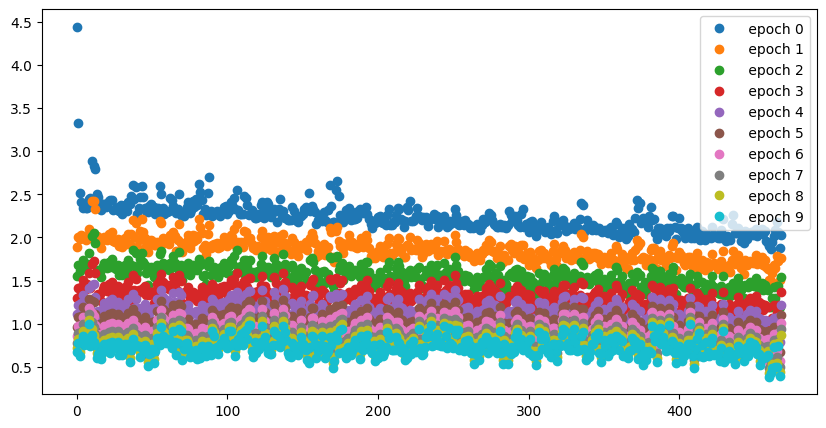

In [ ]:

plt.figure(figsize=(10,5))
epoch = 0
for los in np_loss_matrix:
  epoch_label = f" epoch {epoch}"
  plt.plot( los , 'o', label = epoch_label )
  epoch = epoch +1

plt.legend()
plt.show()

## test the model

In [ ]:
prediction = model(test_images)
prediction = prediction.numpy()
print(prediction[1:10])


-- Call NaiveSequetial -------------------------------------------
applyng layer in sequential 

-- Call NaiveDense -------------------------------------------
W: 
(784, 512)
b: 
(512,)
inputs: 
(10000, 784)
(10000, 512)
applyng layer in sequential 

-- Call NaiveDense -------------------------------------------
W: 
(512, 10)
b: 
(10,)
inputs: 
(10000, 512)
(10000, 10)
[[0.07326108 0.0147514  0.3078764  0.2635899  0.00081955 0.08526099 0.17877617 0.00043182 0.07369161 0.00154113]
 [0.00250931 0.85032064 0.02547025 0.03031309 0.00680395 0.01268912 0.01515917 0.01425431 0.03072357 0.01175649]
 [0.8937975  0.00006429 0.00345329 0.00774952 0.00182755 0.02738027 0.04353644 0.00665456 0.00421205 0.01132462]
 [0.0426935  0.00147931 0.03758616 0.01265759 0.52004194 0.01785987 0.05472009 0.05861658 0.04303131 0.2113136 ]
 [0.00059362 0.91671884 0.00979765 0.02098164 0.00287167 0.00534293 0.00288262 0.01079029 0.02143713 0.00858363]
 [0.00515028 0.0042124  0.00641247 0.05790909 0.38329217 0.0550

In [ ]:
predicted_label = np.argmax(prediction, axis=1)
print(predicted_label[1:10])

[2 1 0 4 1 4 9 6 9]


In [ ]:
matches = (predicted_label == test_labels)
print(matches[1:10])

[ True  True  True  True  True  True  True False  True]


In [ ]:
print(f"accurancy: {matches.mean() :.2f}")

accurancy: 0.82
